# Importing Neccessary Libraries

In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the Built-in Sklearn Breast Cancer Dataset

In [51]:
cancerData = datasets.load_breast_cancer()

In [52]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
y = cancerData.target

In [54]:
X.shape

(569, 30)

# Splitting into Train and Test datasets

In [55]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [56]:
X_train.shape

(512, 30)

In [57]:
y_test.shape

(57,)

# Applying StandardScaler()

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [60]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

# Preparing the Model

In [61]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 16)            48        
_________________________________________________________________
batch_normalization_8 (Batch (None, 29, 16)            64        
_________________________________________________________________
dropout_11 (Dropout)         (None, 29, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)              

In [63]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 1s 2ms/sample - loss: 0.8354 - accuracy: 0.5391 - val_loss: 0.6784 - val_accuracy: 0.4211
Epoch 2/35
512/512 [==============================] - 0s 172us/sample - loss: 0.5398 - accuracy: 0.7422 - val_loss: 0.6512 - val_accuracy: 0.5614
Epoch 3/35
512/512 [==============================] - 0s 187us/sample - loss: 0.3920 - accuracy: 0.8340 - val_loss: 0.6271 - val_accuracy: 0.6491
Epoch 4/35
512/512 [==============================] - 0s 178us/sample - loss: 0.3122 - accuracy: 0.8672 - val_loss: 0.6024 - val_accuracy: 0.6491
Epoch 5/35
512/512 [==============================] - 0s 176us/sample - loss: 0.2627 - accuracy: 0.9062 - val_loss: 0.5756 - val_accuracy: 0.6842
Epoch 6/35
512/512 [==============================] - 0s 186us/sample - loss: 0.2340 - accuracy: 0.9277 - val_loss: 0.5463 - val_accuracy: 0.7018
Epoch 7/35
512/512 [==============================] - 0s 190us/sample - loss: 0.2

# Plots of Accuracy and Loss

In [65]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

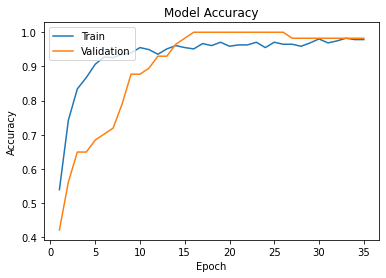

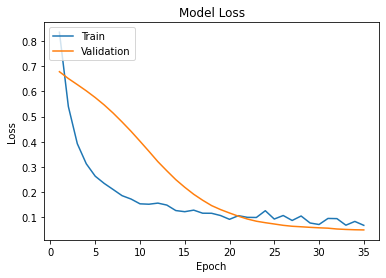

In [66]:
plotLearningCurve(history,35)

In [67]:
model2 = Sequential()

# First dense layer
model2.add(Dense(64, activation='relu', input_shape=(30,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# Second dense layer
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# Output layer for binary classification
model2.add(Dense(1, activation='sigmoid'))


In [68]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                1984      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32)                128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [69]:
model2.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
# Reshape the input data
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Now fit the model with the reshaped data
history2 = model2.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))


Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 1s 2ms/sample - loss: 1.2892 - accuracy: 0.3828 - val_loss: 0.9156 - val_accuracy: 0.2281
Epoch 2/35
512/512 [==============================] - 0s 99us/sample - loss: 1.0787 - accuracy: 0.4492 - val_loss: 0.8476 - val_accuracy: 0.2807
Epoch 3/35
512/512 [==============================] - 0s 109us/sample - loss: 1.0078 - accuracy: 0.4570 - val_loss: 0.7864 - val_accuracy: 0.3860
Epoch 4/35
512/512 [==============================] - 0s 115us/sample - loss: 0.8417 - accuracy: 0.5449 - val_loss: 0.7277 - val_accuracy: 0.5439
Epoch 5/35
512/512 [==============================] - 0s 116us/sample - loss: 0.7992 - accuracy: 0.5840 - val_loss: 0.6742 - val_accuracy: 0.5614
Epoch 6/35
512/512 [==============================] - 0s 118us/sample - loss: 0.7069 - accuracy: 0.6445 - val_loss: 0.6229 - val_accuracy: 0.6491
Epoch 7/35
512/512 [==============================] - 0s 97us/sample - loss: 0.665

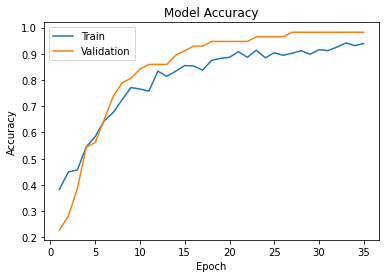

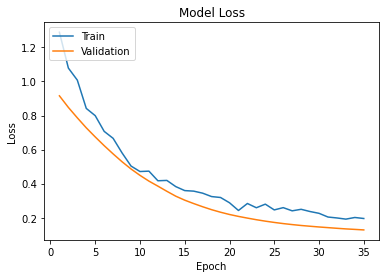

In [71]:
plotLearningCurve(history2,35)

In [72]:
from tensorflow.keras.layers import LSTM

model3 = Sequential()

# LSTM layer with 50 units
model3.add(LSTM(50, activation='tanh', return_sequences=False, input_shape=(30, 1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Dense layer
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Output layer for binary classification
model3.add(Dense(1, activation='sigmoid'))


In [73]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
batch_normalization_12 (Batc (None, 50)                200       
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1632      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32)                128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [74]:
model3.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
# Reshape the input data to 3D for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Now fit the model with the reshaped 3D data
history3 = model3.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))


Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 3s 6ms/sample - loss: 0.7653 - accuracy: 0.5625 - val_loss: 0.7084 - val_accuracy: 0.2632
Epoch 2/35
512/512 [==============================] - 0s 572us/sample - loss: 0.5966 - accuracy: 0.6836 - val_loss: 0.7064 - val_accuracy: 0.3158
Epoch 3/35
512/512 [==============================] - 0s 616us/sample - loss: 0.5337 - accuracy: 0.7090 - val_loss: 0.7041 - val_accuracy: 0.3684
Epoch 4/35
512/512 [==============================] - 0s 584us/sample - loss: 0.4632 - accuracy: 0.7852 - val_loss: 0.7009 - val_accuracy: 0.3684
Epoch 5/35
512/512 [==============================] - 0s 517us/sample - loss: 0.4279 - accuracy: 0.8164 - val_loss: 0.6975 - val_accuracy: 0.3684
Epoch 6/35
512/512 [==============================] - 0s 531us/sample - loss: 0.4131 - accuracy: 0.8203 - val_loss: 0.6926 - val_accuracy: 0.3684
Epoch 7/35
512/512 [==============================] - 0s 554us/sample - loss: 0.3

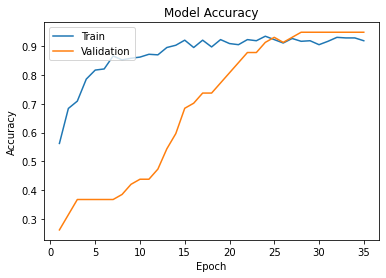

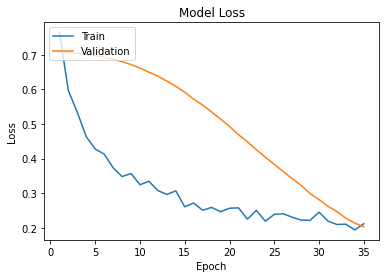

In [76]:
plotLearningCurve(history3,35)

In [77]:
from tensorflow.keras.layers import GRU

model4 = Sequential()

# GRU layer with 50 units
model4.add(GRU(50, activation='tanh', return_sequences=False, input_shape=(30, 1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Dense layer
model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Output layer for binary classification
model4.add(Dense(1, activation='sigmoid'))


In [78]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50)                7950      
_________________________________________________________________
batch_normalization_14 (Batc (None, 50)                200       
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1632      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32)                128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [79]:
model4.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
# Reshape the input data to 3D for GRU
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Now fit the model with the reshaped 3D data
history4 = model4.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))


Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 3s 5ms/sample - loss: 1.0422 - accuracy: 0.4004 - val_loss: 0.6786 - val_accuracy: 0.6316
Epoch 2/35
512/512 [==============================] - 0s 548us/sample - loss: 0.8374 - accuracy: 0.5293 - val_loss: 0.6798 - val_accuracy: 0.5614
Epoch 3/35
512/512 [==============================] - 0s 515us/sample - loss: 0.7621 - accuracy: 0.5938 - val_loss: 0.6806 - val_accuracy: 0.5614
Epoch 4/35
512/512 [==============================] - 0s 529us/sample - loss: 0.6337 - accuracy: 0.6895 - val_loss: 0.6822 - val_accuracy: 0.5439
Epoch 5/35
512/512 [==============================] - 0s 502us/sample - loss: 0.6093 - accuracy: 0.7051 - val_loss: 0.6829 - val_accuracy: 0.5439
Epoch 6/35
512/512 [==============================] - 0s 486us/sample - loss: 0.5191 - accuracy: 0.7285 - val_loss: 0.6804 - val_accuracy: 0.5439
Epoch 7/35
512/512 [==============================] - 0s 510us/sample - loss: 0.5

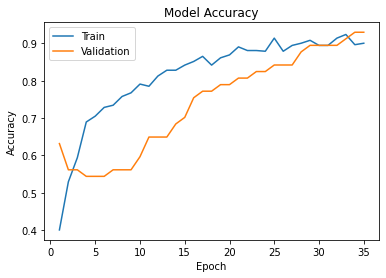

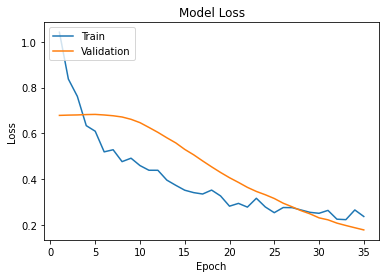

In [81]:
plotLearningCurve(history4,35)

In [92]:
from tensorflow.keras.layers import SimpleRNN

model5 = Sequential()

# RNN layer
model5.add(SimpleRNN(50, activation='tanh', input_shape=(30, 1)))
model5.add(Dropout(0.2))

# Dense layer
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.2))

# Output layer
model5.add(Dense(1, activation='sigmoid'))


In [93]:
model5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dropout_22 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1632      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 4,265
Trainable params: 4,265
Non-trainable params: 0
_________________________________________________________________


In [94]:
model5.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
# Reshape the input data to 3D for RNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Now fit the model with the reshaped 3D data
history5 = model5.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))


Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 1s 2ms/sample - loss: 0.6346 - accuracy: 0.6719 - val_loss: 0.6028 - val_accuracy: 0.7544
Epoch 2/35
512/512 [==============================] - 0s 354us/sample - loss: 0.5746 - accuracy: 0.7852 - val_loss: 0.5435 - val_accuracy: 0.8596
Epoch 3/35
512/512 [==============================] - 0s 328us/sample - loss: 0.5269 - accuracy: 0.8047 - val_loss: 0.4868 - val_accuracy: 0.8947
Epoch 4/35
512/512 [==============================] - 0s 325us/sample - loss: 0.4592 - accuracy: 0.8750 - val_loss: 0.4331 - val_accuracy: 0.8772
Epoch 5/35
512/512 [==============================] - 0s 322us/sample - loss: 0.4113 - accuracy: 0.8926 - val_loss: 0.3801 - val_accuracy: 0.8772
Epoch 6/35
512/512 [==============================] - 0s 318us/sample - loss: 0.3809 - accuracy: 0.9004 - val_loss: 0.3402 - val_accuracy: 0.8772
Epoch 7/35
512/512 [==============================] - 0s 347us/sample - loss: 0.3

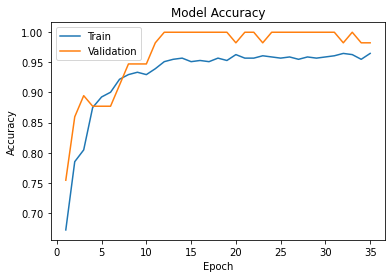

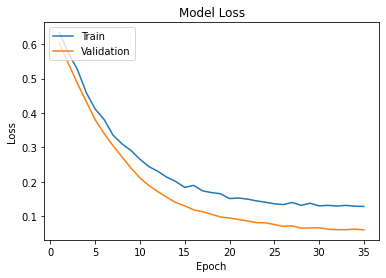

In [96]:
plotLearningCurve(history5,35)

Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 0s 203us/sample - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.0539 - val_accuracy: 0.9825
Epoch 2/35
512/512 [==============================] - 0s 200us/sample - loss: 0.0436 - accuracy: 0.9844 - val_loss: 0.0543 - val_accuracy: 0.9825
Epoch 3/35
512/512 [==============================] - 0s 187us/sample - loss: 0.0485 - accuracy: 0.9883 - val_loss: 0.0542 - val_accuracy: 0.9825
Epoch 4/35
512/512 [==============================] - 0s 194us/sample - loss: 0.0569 - accuracy: 0.9766 - val_loss: 0.0529 - val_accuracy: 0.9825
Epoch 5/35
512/512 [==============================] - 0s 187us/sample - loss: 0.0564 - accuracy: 0.9785 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 6/35
512/512 [==============================] - 0s 186us/sample - loss: 0.0370 - accuracy: 0.9863 - val_loss: 0.0532 - val_accuracy: 0.9825
Epoch 7/35
512/512 [==============================] - 0s 177us/sample - loss: 0

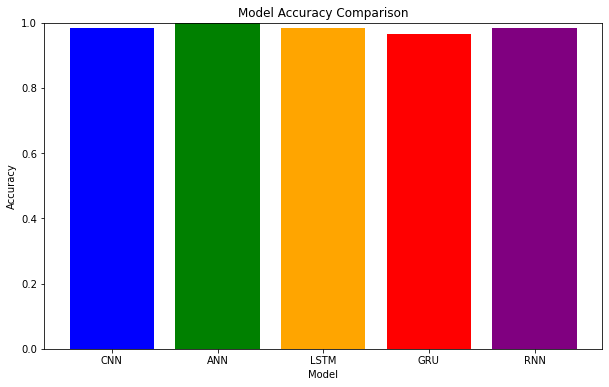

In [97]:
# Model 1 (CNN)
history1 = model.fit(X_train, y_train, epochs=35, verbose=1, validation_data=(X_test, y_test))
cnn_test_acc = model.evaluate(X_test, y_test, verbose=0)[1]  # Accuracy of CNN

# Model 2 (ANN) - with reshaping
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1])  # Flatten for ANN
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])
history2 = model2.fit(X_train_flat, y_train, epochs=35, verbose=1, validation_data=(X_test_flat, y_test))
ann_test_acc = model2.evaluate(X_test_flat, y_test, verbose=0)[1]  # Accuracy of ANN

# Model 3 (LSTM)
history3 = model3.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))
lstm_test_acc = model3.evaluate(X_test_reshaped, y_test, verbose=0)[1]  # Accuracy of LSTM

# Model 4 (GRU)
history4 = model4.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))
gru_test_acc = model4.evaluate(X_test_reshaped, y_test, verbose=0)[1]  # Accuracy of GRU

# Model 5 (RNN)
history5 = model5.fit(X_train_reshaped, y_train, epochs=35, verbose=1, validation_data=(X_test_reshaped, y_test))
rnn_test_acc = model5.evaluate(X_test_reshaped, y_test, verbose=0)[1]  # Accuracy of RNN

# Print accuracy values
print(f"Model 1 (CNN) Accuracy: {cnn_test_acc * 100:.2f}%")
print(f"Model 2 (ANN) Accuracy: {ann_test_acc * 100:.2f}%")
print(f"Model 3 (LSTM) Accuracy: {lstm_test_acc * 100:.2f}%")
print(f"Model 4 (GRU) Accuracy: {gru_test_acc * 100:.2f}%")
print(f"Model 5 (RNN) Accuracy: {rnn_test_acc * 100:.2f}%")

# Visualize the accuracy comparison
import matplotlib.pyplot as plt

model_names = ['CNN', 'ANN', 'LSTM', 'GRU', 'RNN']
accuracies = [cnn_test_acc, ann_test_acc, lstm_test_acc, gru_test_acc, rnn_test_acc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [102]:
# CNN predictions
cnn_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
X_test_flattened = X_test_reshaped.reshape(X_test_reshaped.shape[0], -1)
# ANN predictions
ann_pred = (model2.predict(X_test_flattened) > 0.5).astype("int32")

# LSTM predictions
lstm_pred = (model3.predict(X_test_reshaped) > 0.5).astype("int32")

# GRU predictions
gru_pred = (model4.predict(X_test_reshaped) > 0.5).astype("int32")

# RNN predictions
rnn_pred = (model5.predict(X_test_reshaped) > 0.5).astype("int32")


In [103]:
from sklearn.metrics import confusion_matrix

# CNN confusion matrix
cnn_cm = confusion_matrix(y_test, cnn_pred)

# ANN confusion matrix
ann_cm = confusion_matrix(y_test, ann_pred)

# LSTM confusion matrix
lstm_cm = confusion_matrix(y_test, lstm_pred)

# GRU confusion matrix
gru_cm = confusion_matrix(y_test, gru_pred)

# RNN confusion matrix
rnn_cm = confusion_matrix(y_test, rnn_pred)

# Optionally, print the confusion matrices
print("Confusion Matrix for CNN:\n", cnn_cm)
print("Confusion Matrix for ANN:\n", ann_cm)
print("Confusion Matrix for LSTM:\n", lstm_cm)
print("Confusion Matrix for GRU:\n", gru_cm)
print("Confusion Matrix for RNN:\n", rnn_cm)


Confusion Matrix for CNN:
 [[20  1]
 [ 0 36]]
Confusion Matrix for ANN:
 [[21  0]
 [ 0 36]]
Confusion Matrix for LSTM:
 [[20  1]
 [ 0 36]]
Confusion Matrix for GRU:
 [[20  1]
 [ 1 35]]
Confusion Matrix for RNN:
 [[20  1]
 [ 0 36]]


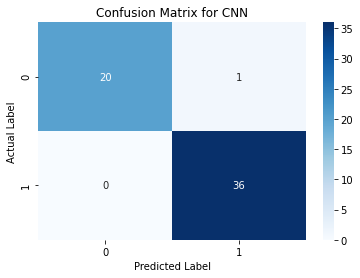

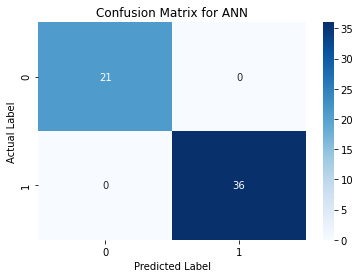

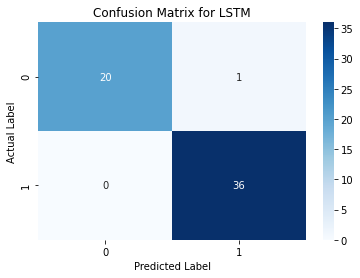

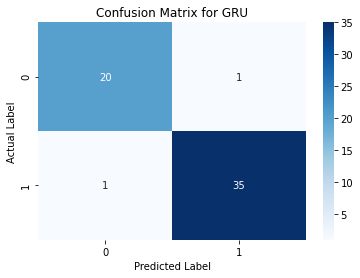

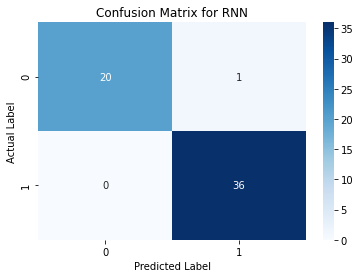

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(cnn_cm, "Confusion Matrix for CNN")
plot_confusion_matrix(ann_cm, "Confusion Matrix for ANN")
plot_confusion_matrix(lstm_cm, "Confusion Matrix for LSTM")
plot_confusion_matrix(gru_cm, "Confusion Matrix for GRU")
plot_confusion_matrix(rnn_cm, "Confusion Matrix for RNN")
